# Part 2 - Classification with PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Hyperparameters

In [ ]:
device = 'cuda'
n_epochs = 10
batch_size_train = 128
batch_size_test = 32
learning_rate = 0.1
momentum = 0.9

# Prepare FashionMNIST image dataset

Using torchvision api to download MNIST data. MNIST data contains 10 classes of fashion.

In [ ]:
transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])

train_data = torchvision.datasets.FashionMNIST('./data', train=True, download=True,
                                       transform=transform)
validation_data = torchvision.datasets.FashionMNIST('./data', train=False, download=True,
                                      transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, 
                                           shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size_test, 
                                           shuffle=True)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


# Define Model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        """
        Define Neural Netowork layers:
        1. Input layer of 784 nodes
        2. 2 hidden layers
            - First hiddden layer has 256 nodes
            - Second hidden layer has 50 nodes
        3. Output layers according to number of classes 
        """

    def forward(self, x):
        """
        Connect Neural Network
        1. All layers use RELU as activation function
        2. Use log softmax for output layer
        """

        return None

In [ ]:
# Initialize model and send to GPU
network = Net().to(device)

# Set algorithm for parameter update
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

# Train Model

### Evaluation Function

In [ ]:
def evaluate():
    network.eval()
    val_loss, correct = 0, 0
    with torch.no_grad():
        for data, target in validation_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)
            output = network(data)
            val_loss += F.nll_loss(output, target, size_average=False).item() 
            
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    val_loss /= len(validation_loader.dataset)
    val_losses.append(val_loss)
    print('\nValidation set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset),
        100. * correct / len(validation_loader.dataset)))

In [ ]:
network

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)

### Training Loop

In [ ]:
train_losses, train_counter, val_losses = [], [], []

In [ ]:
"""
Build training Loop. Print training loss for every 10 data batch interval
"""



'\nBuild training Loop. Print training loss for every 10 data batch interval\n'

# View Evaluation

In [ ]:
# Evaluate on one batch only
examples = enumerate(validation_loader)
batch_idx, (example_data, example_targets) = next(examples)

# To run model without performing grading parameters
with torch.no_grad():

    # Prepare dataset
    pred_data = example_data
    pred_data = pred_data.view(pred_data.shape[0], -1)

    # Set model to evaluation mode
    network.eval()

    # Inference
    predictions = network(pred_data.to(device))

    # Format predictions to get labels
    predicted_labels = predictions.data.max(1, keepdim=True)[1].cpu().detach().numpy()

In [ ]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", 
                  "Dress", "Coat", "Sandal", "Shirt", 
                  "Sneaker", "Bag", "Ankle boot"]

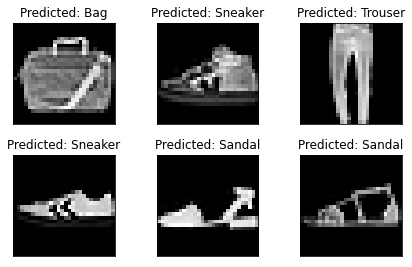

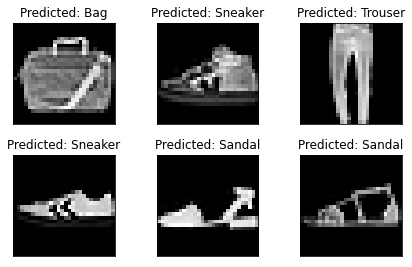

In [ ]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Predicted: {}".format(fashion_labels[predicted_labels[i][0]]))
    plt.xticks([])
    plt.yticks([])
fig